<a href="https://colab.research.google.com/github/icarocarmona/pos-tech-dtat/blob/main/f2_ml_and_time_series/ml_with_python/Aula_1_Machine_Learning_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# Base de dados
# https://github.com/FIAP/Pos_Tech_DTAT/tree/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados



In [3]:
df_excel = pd.read_excel('https://github.com/FIAP/Pos_Tech_DTAT/raw/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Chess.xlsx', sheet_name='Chess')
df_excel.head(2)

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4


In [4]:
df_csv = pd.read_csv('https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/Tomato.csv', sep=',')
df_csv.head(2)

,Date,Unit,Minimum,Maximum,Average,Market
0,2013-06-16,Kg,26,32,29.0,Tomato
1,2013-06-17,Kg,20,25,22.5,Tomato


In [5]:
df_excel.describe().T

,count,mean,std,min,25%,50%,75%,max
created_at,20058.0,6.321335e+16,7.292307e+16,1.376772e+12,1.498313e+12,1.504366e+12,1.486680e+17,1.504470e+17
last_move_at,20058.0,6.313080e+16,7.290633e+16,1.376772e+12,1.498315e+12,1.504367e+12,1.486680e+17,1.504470e+17
turns,20058.0,6.046600e+01,3.357058e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,20058.0,1.596632e+03,2.912534e+02,7.840000e+02,1.398000e+03,1.567000e+03,1.793000e+03,2.700000e+03
black_rating,20058.0,1.588832e+03,2.910361e+02,7.890000e+02,1.391000e+03,1.562000e+03,1.784000e+03,2.723000e+03
opening_ply,20058.0,4.816981e+00,2.797152e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01


In [6]:
df_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
Minimum,2741.0,35.089748,16.648425,8.0,22.0,30.0,45.0,115.0
Maximum,2741.0,41.281284,17.364135,12.0,30.0,38.0,50.0,120.0
Average,2741.0,38.185516,16.970949,10.0,25.0,35.0,47.5,117.5


In [7]:
set(df_excel['victory_status'])

{'draw', 'mate', 'outoftime', 'resign'}

In [8]:
def categorizar_tomate_media( media ):
  if media >= 40 and media <= 70:
    return "tomate medio"
  elif media < 40:
    return "tomate pequeno"
  else:
    return "tomatão"

In [9]:
df_csv["categoria_tomate"] = df_csv['Average'].apply(categorizar_tomate_media)
df_csv.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno


In [10]:
df_csv.groupby(['categoria_tomate']).describe()

Minimum                                                      \
                   count       mean       std   min   25%   50%   75%    max   
categoria_tomate                                                               
tomate medio       954.0  47.818658  8.203065  30.0  40.0  45.0  55.0   65.0   
tomate pequeno    1638.0  23.978022  7.175572   8.0  18.0  25.0  30.0   38.0   
tomatão            149.0  75.744966  7.324666  65.0  70.0  75.0  80.0  115.0   

                 Maximum             ...              Average             \
                   count       mean  ...   75%    max   count       mean   
categoria_tomate                     ...                                   
tomate medio       954.0  55.009434  ...  60.0   75.0   954.0  51.414046   
tomate pequeno    1638.0  29.528694  ...  35.0   44.0  1638.0  26.753358   
tomatão            149.0  82.583893  ...  85.0  120.0   149.0  79.164430   

                                                           
                       std   min   25%   50%   75%    max  
categoria_tomate                                           
tomate medio      8.272792  40.0  45.0  50.0  57.5   70.0  
tomate pequeno    7.191735  10.0  21.5  27.5  32.5   39.5  
tomatão           7.367396  70.5  75.0  77.5  82.5  117.5  

[3 rows x 24 columns]

In [11]:
filtro = df_csv['Average'] < 40
df_csv.loc[filtro]

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno
...,...,...,...,...,...,...,...
2736,2021-05-09,Kg,10,15,12.5,Tomato,tomate pequeno
2737,2021-05-10,Kg,10,15,12.5,Tomato,tomate pequeno
2738,2021-05-11,Kg,10,15,12.5,Tomato,tomate pequeno
2739,2021-05-12,Kg,30,35,32.5,Tomato,tomate pequeno


In [12]:
import numpy as np

In [13]:
arr_list = np.array([1,2,3,4,5,6,7,8])

In [14]:
arr_list

array([1, 2, 3, 4, 5, 6, 7, 8])

In [15]:
arr_zeros = np.zeros((4,6))

print(arr_zeros)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [16]:
arr_ones = np.ones((3,4))
print(arr_ones)

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [17]:
arr_random = np.random.rand(3,4)
print(arr_random)

[[0.63373165 0.17515966 0.69816243 0.76250552]
 [0.62894148 0.80608596 0.93616168 0.97731748]
 [0.02174187 0.8573593  0.39222884 0.63996479]]


In [18]:
arr_random.shape

(3, 4)

In [19]:
arr_random.reshape((4,3))

array([[0.63373165, 0.17515966, 0.69816243],
       [0.76250552, 0.62894148, 0.80608596],
       [0.93616168, 0.97731748, 0.02174187],
       [0.8573593 , 0.39222884, 0.63996479]])

In [20]:
arr1 = np.array([[1,2],[3,4]])
arr2 = np.array([[5,6], [7,8]])
arr3 = np.array([[9,10],[11,12]])

In [21]:
arr4 = np.concatenate((arr1,arr2,arr3), axis=1)

In [22]:
arr4

array([[ 1,  2,  5,  6,  9, 10],
       [ 3,  4,  7,  8, 11, 12]])

In [23]:
arr4_split = np.split(arr4, 2)
arr4_split

[array([[ 1,  2,  5,  6,  9, 10]]), array([[ 3,  4,  7,  8, 11, 12]])]

In [24]:
arr4_transpose = np.transpose(arr4)
arr4_transpose

array([[ 1,  3],
       [ 2,  4],
       [ 5,  7],
       [ 6,  8],
       [ 9, 11],
       [10, 12]])

In [25]:
# soma
np.add(arr1,arr2)

array([[ 6,  8],
       [10, 12]])

In [26]:
# subtracao
np.subtract(arr2, arr1)

array([[4, 4],
       [4, 4]])

In [27]:
df_tomato = df_csv
df_tomato.head()

,Date,Unit,Minimum,Maximum,Average,Market,categoria_tomate
0,2013-06-16,Kg,26,32,29.0,Tomato,tomate pequeno
1,2013-06-17,Kg,20,25,22.5,Tomato,tomate pequeno
2,2013-06-18,Kg,22,26,24.0,Tomato,tomate pequeno
3,2013-06-19,Kg,24,28,26.0,Tomato,tomate pequeno
4,2013-06-20,Kg,22,26,24.0,Tomato,tomate pequeno


In [28]:
df_tomato['Date'] = pd.to_datetime(df_tomato['Date'])

In [29]:
df_tomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2741 entries, 0 to 2740
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              2741 non-null   datetime64[ns]
 1   Unit              2741 non-null   object        
 2   Minimum           2741 non-null   int64         
 3   Maximum           2741 non-null   int64         
 4   Average           2741 non-null   float64       
 5   Market            2741 non-null   object        
 6   categoria_tomate  2741 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 150.0+ KB


In [30]:
import matplotlib.pyplot as plt

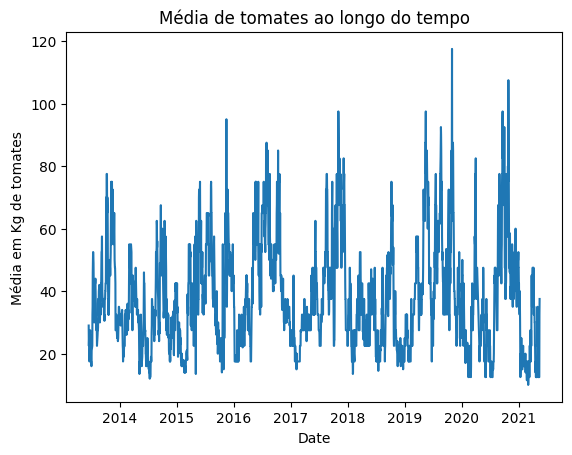

In [31]:
plt.plot(df_tomato['Date'], df_tomato['Average'])
plt.xlabel('Date')
plt.ylabel('Média em Kg de tomates')
plt.title('Média de tomates ao longo do tempo')
plt.show()

In [37]:
df_chess = pd.DataFrame(df_excel)
df_chess.head()

,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,opening_eco,opening_name,opening_ply
0,False,1.504210e+17,1.504210e+17,13,outoftime,white,15+2,bourgris,1500,a-00,1191,D10,Slav Defense: Exchange Variation,5
1,True,1.504130e+17,1.504130e+17,16,resign,black,5+10,a-00,1322,skinnerua,1261,B00,Nimzowitsch Defense: Kennedy Variation,4
2,True,1.504130e+17,1.504130e+17,61,mate,white,5+10,ischia,1496,a-00,1500,C20,King's Pawn Game: Leonardis Variation,3
3,True,1.504110e+17,1.504110e+17,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,True,1.504030e+17,1.504030e+17,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,C41,Philidor Defense,5


Text(0.5, 1.0, 'Partidas e peças pretas x peças brancas')

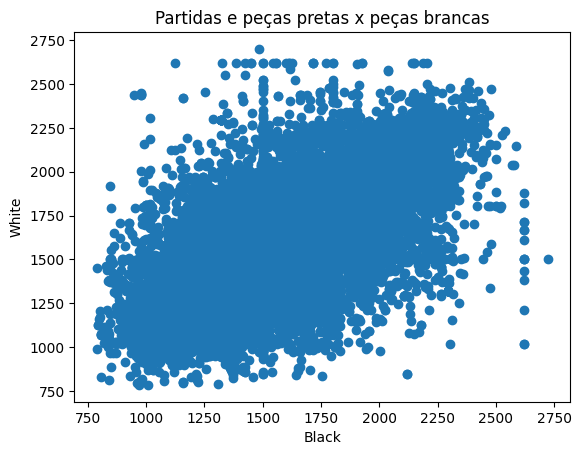

In [33]:
plt.scatter(df_chess['black_rating'], df_chess['white_rating'])
plt.xlabel('Black')
plt.ylabel('White')
plt.title('Partidas e peças pretas x peças brancas')


Text(0.5, 1.0, 'Média de tomates por categoria')

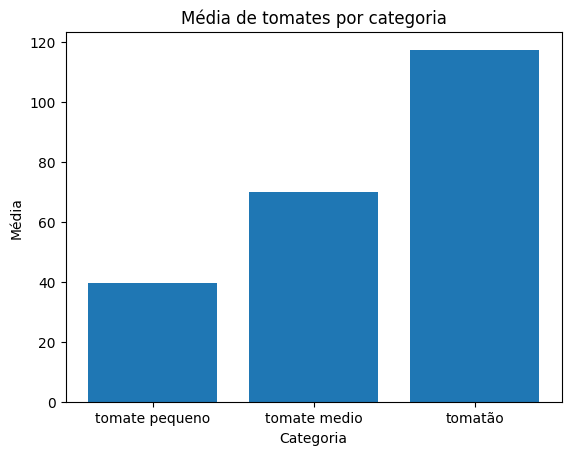

In [34]:
plt.bar(df_tomato['categoria_tomate'], df_tomato['Average'])
plt.xlabel('Categoria')
plt.ylabel('Média')
plt.title('Média de tomates por categoria')


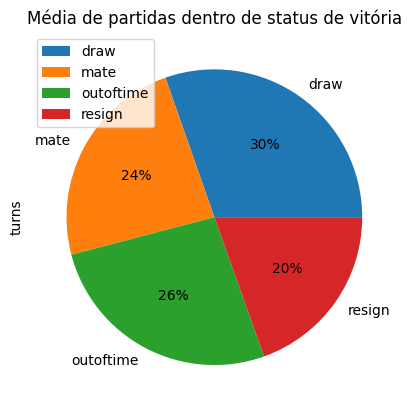

In [56]:
df_chess.groupby(["victory_status"]).mean("turns").plot(kind='pie', y='turns', autopct='%1.0f%%')
plt.title("Média de partidas dentro de status de vitória")
plt.show()

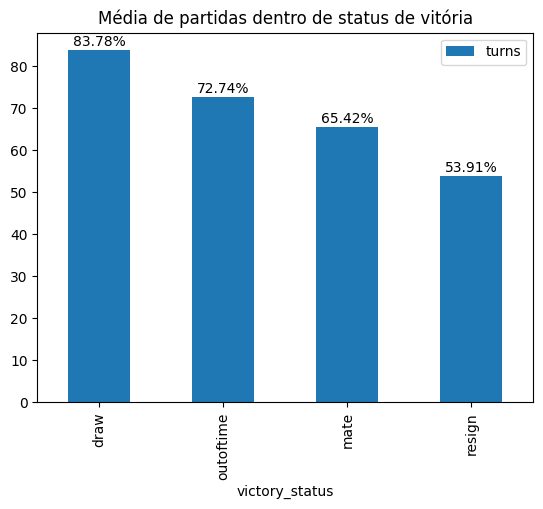

In [57]:
# Seu código existente para criar o gráfico
df_chess.groupby(["victory_status"]).mean("turns").sort_values("turns", ascending=False).plot(kind='bar', y='turns')
plt.title("Média de partidas dentro de status de vitória")

# Adicione a porcentagem em cada barra
ax = plt.gca()
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2f}%', (x + width/2, y + height + 1), ha='center')

plt.show()


## Scikit-Learn


In [60]:
from sklearn.model_selection import train_test_split

In [59]:
df_diabetes = pd.read_csv("https://raw.githubusercontent.com/FIAP/Pos_Tech_DTAT/61a634996879d5c1384af6f567e29659ad68b727/Aula%2002/Base%20de%20Dados/diabetes.csv")
df_diabetes.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [67]:
x = df_diabetes.drop(["Class variable"], axis=1)
x.head(2)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years)
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31


In [69]:
y = df_diabetes["Class variable"]
y.head(2)

0    1
1    0
Name: Class variable, dtype: int64

In [70]:
x_train, x_test , y_train , y_test = train_test_split(x , y, test_size=0.3)

In [73]:
len(x_train)

537

In [75]:
df_diabetes.shape

(768, 9)

In [76]:
len(x_test)

231